Proyecto desafío playground-series-s3e20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
# Subir tu archivo kaggle.json
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s3e20

Saving kaggle.json to kaggle.json
 74% 36.0M/48.9M [00:00<00:00, 130MB/s]
100% 48.9M/48.9M [00:00<00:00, 143MB/s]


In [3]:
import zipfile
import os
zip_filename = 'playground-series-s3e20.zip'
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()
#files = os.listdir()
#files

In [4]:
d = pd.read_csv("train.csv")
d.head()



,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


Tamaño de datos

In [ ]:
## KEEPOUTPUT
print (d.shape)

(4383, 76)


valores faltantes en las columnas

In [ ]:
## KEEPOUTPUT
k = d.isna().sum()
k[k!=0]

SulphurDioxide_SO2_column_number_density          489
SulphurDioxide_SO2_column_number_density_amf      489
SulphurDioxide_SO2_slant_column_number_density    489
SulphurDioxide_cloud_fraction                     489
SulphurDioxide_sensor_azimuth_angle               489
                                                 ... 
Cloud_sensor_azimuth_angle                          1
Cloud_sensor_zenith_angle                           1
Cloud_solar_azimuth_angle                           1
Cloud_solar_zenith_angle                            1
emission                                            1
Length: 71, dtype: int64

inspeccionar variable objetivo

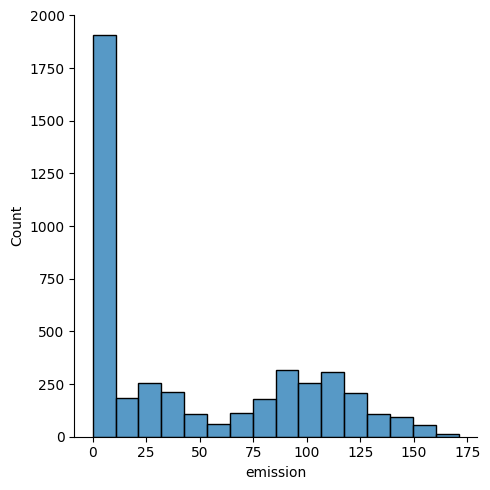

In [ ]:
## KEEPOUTPUT
sns.displot(d['emission']);

descubriendo los datos

In [ ]:
## KEEPOUTPUT
d.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [ ]:
## KEEPOUTPUT
for c in d.columns:
    print ("%20s"%c, d[c].dtype)

ID_LAT_LON_YEAR_WEEK object
            latitude float64
           longitude float64
                year int64
             week_no int64
SulphurDioxide_SO2_column_number_density float64
SulphurDioxide_SO2_column_number_density_amf float64
SulphurDioxide_SO2_slant_column_number_density float64
SulphurDioxide_cloud_fraction float64
SulphurDioxide_sensor_azimuth_angle float64
SulphurDioxide_sensor_zenith_angle float64
SulphurDioxide_solar_azimuth_angle float64
SulphurDioxide_solar_zenith_angle float64
SulphurDioxide_SO2_column_number_density_15km float64
CarbonMonoxide_CO_column_number_density float64
CarbonMonoxide_H2O_column_number_density float64
CarbonMonoxide_cloud_height float64
CarbonMonoxide_sensor_altitude float64
CarbonMonoxide_sensor_azimuth_angle float64
CarbonMonoxide_sensor_zenith_angle float64
CarbonMonoxide_solar_azimuth_angle float64
CarbonMonoxide_solar_zenith_angle float64
NitrogenDioxide_NO2_column_number_density float64
NitrogenDioxide_tropospheric_NO2_column_numbe

inspeccionando columnas numericas

In [ ]:
## KEEPOUTPUT
d._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,4383.0,-0.698112,0.098103,-0.843000,-0.793000,-0.702000,-0.615000,-0.510000
longitude,4383.0,30.000177,0.613455,29.102000,29.472000,29.863000,30.480000,31.494000
year,4383.0,2019.987908,0.815521,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,4383.0,25.932466,15.283193,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,3894.0,0.000032,0.000232,-0.000799,-0.000096,0.000018,0.000139,0.002315
...,...,...,...,...,...,...,...,...
Cloud_sensor_azimuth_angle,4382.0,-11.062394,29.937318,-101.498917,-30.058512,-12.707300,5.370911,76.333656
Cloud_sensor_zenith_angle,4382.0,40.384360,6.428556,13.655860,35.697243,41.041704,44.420048,64.296631
Cloud_solar_azimuth_angle,4382.0,-88.394175,38.034869,-153.464211,-127.217947,-88.190015,-49.594338,-31.903257
Cloud_solar_zenith_angle,4382.0,27.769484,4.280452,10.818288,24.562450,28.212475,31.354767,39.380997


In [ ]:
## KEEPOUTPUT
cols = ['emission','Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
       'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
       'Cloud_cloud_optical_depth', 'Cloud_surface_albedo',
       'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle',
       'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle']
#cols = np.unique(list(np.random.permutation(d._get_numeric_data().columns)[:5])+['emission'])
sns.set()
sns.pairplot(d[cols])

Output hidden; open in https://colab.research.google.com to view.

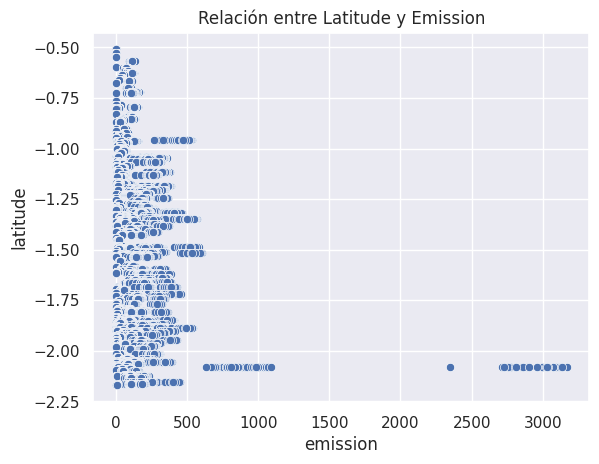

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas de interés
cols_of_interest = ['emission','latitude']

# Crea un scatter plot
sns.scatterplot(y='latitude', x='emission', data=d[cols_of_interest])
plt.title('Relación entre Latitude y Emission')
plt.show()


correlaciones

<ipython-input-7-d63c824516b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = d.corr()


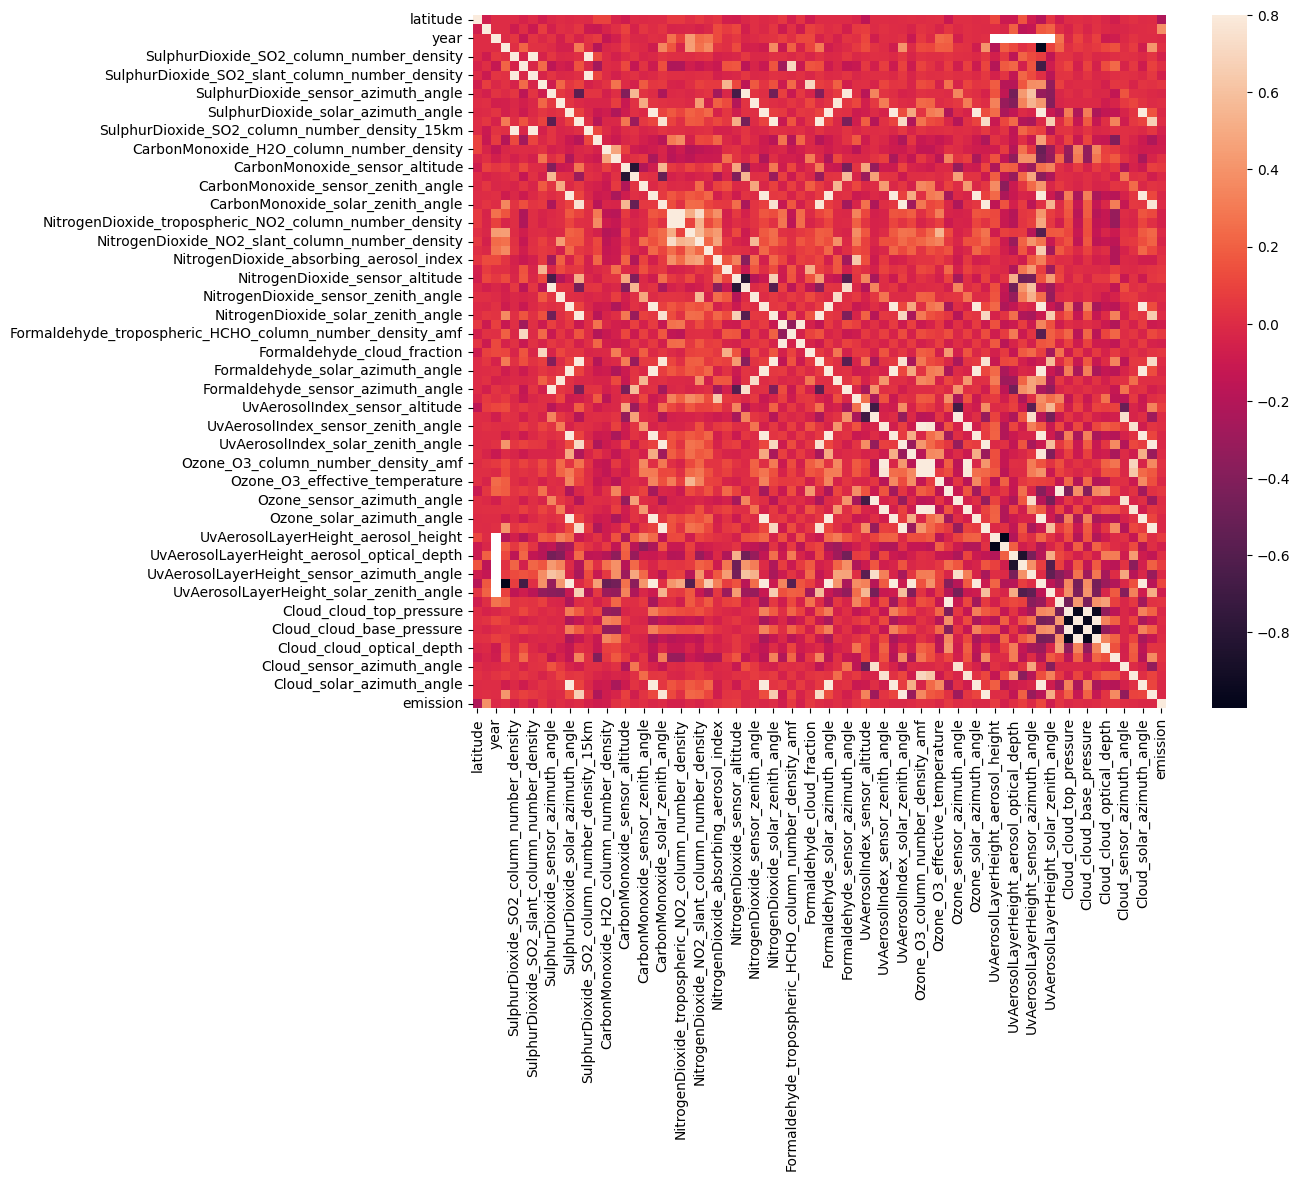

In [ ]:
## KEEPOUTPUT
#correlation matrix
corrmat = d.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

inspeccionar variables categoricas

In [ ]:
ccols = [i for i in d.columns if not i in d._get_numeric_data()]
print (ccols)

['ID_LAT_LON_YEAR_WEEK']
